In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [4]:
# Import
df = pd.read_csv("recentlySold.csv")

In [5]:
df

,ID,Type,Attributes,Attribute Count,Recent Sale Price,Recent Offer,Recent Bid
0,CryptoPunk 300,Male,"['Goat', 'Headband']",2,"69.69Ξ ($262,390)","74.77Ξ ($280,855)","69.69Ξ ($262,390)"
1,CryptoPunk 962,Male,"['Eye Mask', 'Frown', 'Police Cap']",3,"77.77Ξ ($292,124)","77.77Ξ ($292,124)","70Ξ ($262,492)"
2,CryptoPunk 9345,Male,"['Front Beard', 'Mohawk']",2,"69.45Ξ ($258,932)","79.45Ξ ($296,215)","4Ξ ($14,536)"
3,CryptoPunk 8599,Male,"['Normal Beard Black', 'Crazy Hair', 'Pipe']",3,"85Ξ ($316,907)","109.95Ξ ($409,929)","85Ξ ($316,907)"
4,CryptoPunk 1454,Female,"['Red Mohawk', 'Earring']",2,"69Ξ ($255,320)","72.95Ξ ($269,936)","52Ξ ($144,357)"
...,...,...,...,...,...,...,...
4795,CryptoPunk 8396,Male,"['Stringy Hair', 'Mole']",2,"101Ξ ($294,900)","101Ξ ($291,306)",<0.01Ξ ($3)
4796,CryptoPunk 8697,Female,"['Black Lipstick', 'Mohawk', 'Welding Goggles']",3,"160Ξ ($573,541)","187.90Ξ ($896,772)","160Ξ ($535,397)"
4797,CryptoPunk 9319,Male,"['Bandana', 'Clown Eyes Blue', 'Silver Chain']",3,"27.50Ξ ($67,152)","27.50Ξ ($65,413)","17.50Ξ ($38,699)"
4798,CryptoPunk 6041,Male,"['Clown Eyes Blue', 'Crazy Hair']",2,"64.50Ξ ($251,553)","77.70Ξ ($295,501)","64.50Ξ ($247,998)"


In [6]:
#Only select Ethereum for sale price.
df['Recent Sale Price'] = df['Recent Sale Price'].str.split('Ξ') #isolate for the number before ethereum symbol
df['Recent Sale Price'] = df.apply(lambda row : row['Recent Sale Price'][0], axis = 1) # select that number only

In [7]:
df = df[df['Recent Sale Price'] != '<0.01'] # ignore values where it was sold for free

In [8]:
# Some values are listed as 2.5K, or 2.5M. We want to get rid of the K or M and put them in the same scale as the rest of the values.
def sameScale(val):
    if val[-1] == 'K':
        return float(val[:-1]) * 1000
    elif val[-1] == 'M':
        return float(val[:-1]) * 1000000
    else: return val
    
df['Recent Sale Price'] = df.apply(lambda row : sameScale(row['Recent Sale Price']), axis = 1)

C:\Users\cpche\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [9]:
#convert to float
df['Recent Sale Price'] = df['Recent Sale Price'].astype(float)

C:\Users\cpche\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# probably don't need offer or bid price.
df = df.drop(['Recent Offer', 'Recent Bid'], axis=1)

In [11]:
# get all CryptoPunk attributes into a list using code, instead of copy & paste
import requests
from requests import get
from bs4 import BeautifulSoup

allAttributes = []

page = "https://www.larvalabs.com/cryptopunks/attributes"
request = requests.get(page)
soup = BeautifulSoup(request.text)
details = soup.find_all("tr", class_="center attribute-row")

for detail in details:
    allAttributes.append(detail.td.a.text)
    
allAttributes = allAttributes[5:-8] # ignore things that aren't actually attributes
allAttributes

['Beanie',
 'Choker',
 'Pilot Helmet',
 'Tiara',
 'Orange Side',
 'Buck Teeth',
 'Welding Goggles',
 'Pigtails',
 'Pink With Hat',
 'Top Hat',
 'Spots',
 'Rosy Cheeks',
 'Blonde Short',
 'Wild White Hair',
 'Cowboy Hat',
 'Wild Blonde',
 'Straight Hair Blonde',
 'Big Beard',
 'Red Mohawk',
 'Half Shaved',
 'Blonde Bob',
 'Vampire Hair',
 'Clown Hair Green',
 'Straight Hair Dark',
 'Straight Hair',
 'Silver Chain',
 'Dark Hair',
 'Purple Hair',
 'Gold Chain',
 'Medical Mask',
 'Tassle Hat',
 'Fedora',
 'Police Cap',
 'Clown Nose',
 'Smile',
 'Cap Forward',
 'Hoodie',
 'Front Beard Dark',
 'Frown',
 'Purple Eye Shadow',
 'Handlebars',
 'Blue Eye Shadow',
 'Green Eye Shadow',
 'Vape',
 'Front Beard',
 'Chinstrap',
 '3D Glasses',
 'Luxurious Beard',
 'Mustache',
 'Normal Beard Black',
 'Normal Beard',
 'Eye Mask',
 'Goat',
 'Do-rag',
 'Shaved Head',
 'Muttonchops',
 'Peak Spike',
 'Pipe',
 'VR',
 'Cap',
 'Small Shades',
 'Clown Eyes Green',
 'Clown Eyes Blue',
 'Headband',
 'Crazy Hair',
 

In [12]:
# Create a boolean dataframe that represents if a row has an attribute or not. Alternate implementation could be through using dummies for one-hot encoding.

# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

# convert the lists from the Attributes column of the dataframe into a boolean dataframe.
attributes_bool = boolean_df(df["Attributes"], allAttributes)

In [13]:
attributes_bool

,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,Pigtails,Pink With Hat,Top Hat,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4796,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Combine it with the original dataframe
df = pd.concat([df, attributes_bool], axis=1, join='inner')
df = df.drop('Attributes', axis=1)

In [15]:
df

,ID,Type,Attribute Count,Recent Sale Price,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
0,CryptoPunk 300,Male,2,69.69,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,CryptoPunk 962,Male,3,77.77,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,CryptoPunk 9345,Male,2,69.45,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,CryptoPunk 8599,Male,3,85.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,CryptoPunk 1454,Female,2,69.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,CryptoPunk 8396,Male,2,101.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4796,CryptoPunk 8697,Female,3,160.00,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4797,CryptoPunk 9319,Male,3,27.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4798,CryptoPunk 6041,Male,2,64.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# convert Type column into numbers
df = df.replace(to_replace ='Male',
                 value = 0)
df = df.replace(to_replace ='Female',
                 value = 1)
df = df.replace(to_replace ='Zombie',
                 value = 2)
df = df.replace(to_replace ='Ape',
                 value = 3)
df = df.replace(to_replace ='Alien',
                 value = 4)

# convert booleans into numbers
df = df*1

In [17]:
correlation_df = df.drop('ID', axis=1) # Name of the CryptoPunk is unnecesary. Although it would be interesting to analyze if lower number CryptoPunks have a higher value.

In [18]:
correlation_df

,Type,Attribute Count,Recent Sale Price,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
0,0,2,69.69,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,77.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,69.45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,85.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,69.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,2,101.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4796,1,3,160.00,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4797,0,3,27.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,0,2,64.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Convert the dataframe into numbers only to be used for linear regression
correlation_df = correlation_df.astype(np.float64)

correlation_df.dtypes

Type                 float64
Attribute Count      float64
Recent Sale Price    float64
Beanie               float64
Choker               float64
                      ...   
Mole                 float64
Purple Lipstick      float64
Hot Lipstick         float64
Cigarette            float64
Earring              float64
Length: 90, dtype: object

In [20]:
correlation_df.describe()

,Type,Attribute Count,Recent Sale Price,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,...,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.00000
mean,0.355890,2.753133,153.815984,0.001880,0.001253,0.002715,0.002715,0.003133,0.003968,0.005013,...,0.058688,0.055138,0.042607,0.045322,0.063074,0.078321,0.060568,0.053885,0.098371,0.26086
std,0.485332,0.741529,2542.960969,0.043319,0.035381,0.052041,0.052041,0.055890,0.062876,0.070629,...,0.235065,0.228273,0.201989,0.208030,0.243122,0.268704,0.238561,0.225814,0.297847,0.43915
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,66.667500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,3.000000,93.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,3.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,3.000000,5.000000,124460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In the .describe() above, there is a significant outlier for the "Recent Sale Price" column. While keeping the outliers may make the model more accurate due to some NFT's having very rare and valuable attribute, it will be removed for this analysis.

In [21]:
# remove outliers. https://youtu.be/EAezvs0eL1s
correlation_df = correlation_df[(correlation_df['Recent Sale Price'] < correlation_df['Recent Sale Price'].quantile(.995)) & (correlation_df['Recent Sale Price'] > correlation_df['Recent Sale Price'].quantile(.005))]
correlation_df.describe()

,Type,Attribute Count,Recent Sale Price,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
count,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,...,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000
mean,0.348207,2.754056,99.355924,0.001921,0.001281,0.002135,0.002775,0.003202,0.004056,0.005124,...,0.058070,0.056149,0.043126,0.045901,0.062340,0.076644,0.060205,0.052946,0.099061,0.259394
std,0.476453,0.742918,48.799985,0.043797,0.035771,0.046161,0.052615,0.056505,0.063567,0.071405,...,0.233901,0.230233,0.203161,0.209293,0.241798,0.266054,0.237892,0.223950,0.298775,0.438349
min,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,67.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,94.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,5.000000,420.690000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
pd.set_option('display.max_columns', None) # view all columns
correlation_df.corr(method ='pearson')

,Type,Attribute Count,Recent Sale Price,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,Pigtails,Pink With Hat,Top Hat,Spots,Rosy Cheeks,Blonde Short,Wild White Hair,Cowboy Hat,Wild Blonde,Straight Hair Blonde,Big Beard,Red Mohawk,Half Shaved,Blonde Bob,Vampire Hair,Clown Hair Green,Straight Hair Dark,Straight Hair,Silver Chain,Dark Hair,Purple Hair,Gold Chain,Medical Mask,Tassle Hat,Fedora,Police Cap,Clown Nose,Smile,Cap Forward,Hoodie,Front Beard Dark,Frown,Purple Eye Shadow,Handlebars,Blue Eye Shadow,Green Eye Shadow,Vape,Front Beard,Chinstrap,3D Glasses,Luxurious Beard,Mustache,Normal Beard Black,Normal Beard,Eye Mask,Goat,Do-rag,Shaved Head,Muttonchops,Peak Spike,Pipe,VR,Cap,Small Shades,Clown Eyes Green,Clown Eyes Blue,Headband,Crazy Hair,Knitted Cap,Mohawk Dark,Mohawk,Mohawk Thin,Frumpy Hair,Wild Hair,Messy Hair,Eye Patch,Stringy Hair,Bandana,Classic Shades,Shadow Beard,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring
Type,1.000000,0.019386,-0.067740,-0.032070,0.048998,0.063284,0.072178,0.077548,-0.046646,0.098186,0.120408,0.096108,-0.075151,0.026718,0.043782,0.163562,0.109846,-0.065220,0.080100,0.150499,-0.082553,0.168518,0.154528,0.133231,-0.098169,0.010298,0.183759,0.301549,-0.074567,0.194726,-0.103456,0.009679,0.004953,0.174527,-0.105164,-0.110141,-0.024958,-0.110141,-0.136564,-0.102303,-0.138343,-0.123003,0.222794,-0.126871,0.209189,0.230243,-0.013934,-0.208028,-0.137900,-0.025203,-0.119527,-0.140539,-0.122019,-0.180416,-0.054650,-0.147379,-0.146539,-0.141843,-0.141409,-0.124466,0.014490,-0.034012,-0.151004,-0.125914,0.116286,0.097119,-0.083939,0.027352,-0.001934,0.014094,0.077685,-0.015387,-0.010313,-0.029899,-0.062130,-0.076169,-0.005630,0.002590,0.005402,-0.166851,-0.012861,-0.032272,-0.040454,-0.006134,0.352774,0.033681,0.346287,0.323494,0.024649,0.018331
Attribute Count,0.019386,1.000000,0.040733,-0.018287,-0.004213,0.002861,-0.015311,-0.021929,0.003043,-0.024544,-0.003772,0.006812,-0.045052,0.040567,0.026677,-0.011626,0.037390,-0.006169,-0.024949,-0.005889,0.055434,0.019462,0.029664,-0.012449,0.003079,-0.051642,0.018328,0.016913,0.005620,0.040942,0.003369,0.043046,0.040185,0.021628,0.033365,-0.030081,0.044521,0.096704,0.014103,0.023312,0.048511,0.103134,0.064785,0.004595,0.052546,0.099622,0.110592,0.072401,0.024605,0.055086,0.028881,0.009412,0.051733,0.052078,0.020471,0.005945,-0.011160,0.012003,0.056350,0.007753,0.065154,0.037371,-0.028158,0.086239,-0.004438,0.004740,0.016396,-0.016524,-0.017074,0.005954,0.028313,0.003365,0.011188,0.024224,0.015402,0.099909,0.020287,-0.018908,0.068083,0.121941,0.041654,0.069517,0.081606,0.080860,0.194732,0.115915,0.122463,0.109087,0.184824,0.468064
Recent Sale Price,-0.067740,0.040733,1.000000,0.200471,0.025415,0.070824,0.076945,0.031170,0.016197,0.035745,0.042315,0.076536,0.140380,-0.000572,-0.003343,-0.024470,0.028797,0.047727,0.028820,0.018539,0.051736,-0.023806,-0.028876,-0.018420,0.006799,-0.025514,-0.025304,-0.024284,-0.002963,-0.001614,0.033204,0.057756,0.024067,-0.020716,0.032903,-0.007429,0.046173,0.071600,0.024355,0.421190,-0.021137,-0.022658,-0.052780,0.015390,-0.072407,0.004551,0.053594,-0.007582,0.005839,0.142655,0.065481,-0.012046,0.015193,0.038252,-0.002716,0.008283,-0.057472,-0.024585,-0.051172,-0.031560,0.043503,0.065031,0.023788,0.009663,-0.022994,-0.030235,-0.029807,0.057349,-0.019420,-0.051931,-0.102276,-0.035544,-0.076195,-0.034271,-0.033270,-0.006742,-0.076867,-0.036130,-0.029913,0.028635,0.052231,-0.035715,0.099612,0.033143,-0.039782,-0.039640,-0.011666,-0.047470,-0.031121,-0.034311
Beanie,-0.032070,-0.018287,0.200471,1.000000,-0.001571,-0.002029,-0.002315,-0.002487,-0.002800,-0.003149,-0.003861,-0.003082,-0.004511,-0.005040,-0.004913,-0.005245,-0.003523,-0.003915,-0.002569,-0.004826,-0.004956,-0.005404,-0.004956,-0.004273,-0.005893,-0.005597,-0.005893,-0.009671,-0.006514,-0.006245,-0.006210,-0.004603,-0.005325,-0.005597,-0.006313,-0.006612,-0.006176,-0.

~~## 5 Pages of Data~~
~~Type, Hoodie, Bandana, Beanie, 3D Glasses had the most positive impact on the recent sale price.~~
~~Attribute Count and Mohawk had the most negative impact on the recent sale price.~~

## 50 Pages of Data
Hoodie, Beanie, 3D Glasses, and Top Hat had the most positive impact on recent sale price, while Mohawk had the most negative impact on recent sale price.

One question that arises from this is that NFT's with very rare attributes are rarely sold (in addition to these potentially being counted as outliers, which were removed). As a result, could the Pearson correlation be missing how impactful some attributes are?


# Linear Regression Model

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#set x and y variables for the model
X = correlation_df.drop('Recent Sale Price', axis=1)
Y = correlation_df['Recent Sale Price']

In [24]:
X.shape, Y.shape

((4684, 89), (4684,))

In [25]:
#split data for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
# check shapes of test and train data.
X_train.shape, Y_train.shape

((3747, 89), (3747,))

In [27]:
X_test.shape, Y_test.shape

((937, 89), (937,))

In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [30]:
# Results of model
print('Coefficients:', model.coef_) # Feature Importances
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('R^2 score: %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 1.21407527e+00 -1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.85344238e+01  1.80859956e+12
  1.53817749e+01  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12 -2.47875977e+00  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12 -1.63153687e+01  1.80859956e+12
  1.80859956e+12 -8.63940430e+00  1.80859956e+12 -8.77966309e+00
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12 -1.25268555e+00
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.80859956e+12  1.80859956e+12  1.80859956e+12  1.80859956e+12
  1.8085995

In [31]:
# Output the respective column to the coefficient above.
X.columns

Index(['Type', 'Attribute Count', 'Beanie', 'Choker', 'Pilot Helmet', 'Tiara',
       'Orange Side', 'Buck Teeth', 'Welding Goggles', 'Pigtails',
       'Pink With Hat', 'Top Hat', 'Spots', 'Rosy Cheeks', 'Blonde Short',
       'Wild White Hair', 'Cowboy Hat', 'Wild Blonde', 'Straight Hair Blonde',
       'Big Beard', 'Red Mohawk', 'Half Shaved', 'Blonde Bob', 'Vampire Hair',
       'Clown Hair Green', 'Straight Hair Dark', 'Straight Hair',
       'Silver Chain', 'Dark Hair', 'Purple Hair', 'Gold Chain',
       'Medical Mask', 'Tassle Hat', 'Fedora', 'Police Cap', 'Clown Nose',
       'Smile', 'Cap Forward', 'Hoodie', 'Front Beard Dark', 'Frown',
       'Purple Eye Shadow', 'Handlebars', 'Blue Eye Shadow',
       'Green Eye Shadow', 'Vape', 'Front Beard', 'Chinstrap', '3D Glasses',
       'Luxurious Beard', 'Mustache', 'Normal Beard Black', 'Normal Beard',
       'Eye Mask', 'Goat', 'Do-rag', 'Shaved Head', 'Muttonchops',
       'Peak Spike', 'Pipe', 'VR', 'Cap', 'Small Shades', 'Clown

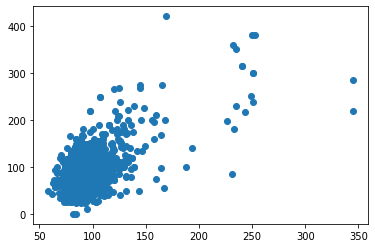

In [32]:
plt.scatter(Y_pred, Y_test)

The predictions appear close to the test data.

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

# Final Thoughts

This linear regression model works well for CryptoPunks that are closer to the average value. That is, CryptoPunks that aren't extremely special and valuable due to a certain rare attribute.
This is because of the decisison to remove outliers from our dataset, that may have been valued highly because they contained rare attributes.

## Decision choices:
Use up to 6 months of data (in this case, 50 pages of data) as while the value of NFT's were rapidly increasing which would mean old data could deflate the predicted price, not allowing enough data would make the model unfamiliar with certain attributes not in the dataset.

As these CryptoPunk were traded for Ethereum, the decision to make the price value in terms of Ethereum was more logical. However, it is unknown if these NFT's follow their value in USD (ex. if Ethereum drops 10%, the NFT's value would remain the same in USD) or if it's in ETH.